In [13]:
from sklearn import tree
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt

In [14]:
# INPUT_FILENAME     The name of the file that contains the data (CSV format)
# TRAINING_PART      The amount of data used to train the model 
#                         (0.5=50% of observations for training; 50% for validation)
# MINIMUMSPLIT       Controls the number of observations in each node
# MAX_DEPTH          Controls the number of nodes in the tree
# OUTPUT_COLUMN      The name of the column we'd like to predict
INPUT_FILENAME    = "Churn_Modelling.csv"
TRAINING_PART     = 0.60
MAX_DEPTH         = 5
MINIMUMSPLIT      = 1000
OUTPUT_COLUMN     = 'Exited'

In [15]:
#turning csv file to pandas dataframe & separating features and the label
df = pd.read_csv(INPUT_FILENAME)
df = df.dropna(axis=0, how='any')

features = df.drop(columns=['RowNumber', 'CustomerId', 'Surname', OUTPUT_COLUMN])
target = df[OUTPUT_COLUMN]
print(features)

      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  
0           

In [16]:
#getting the dummy values of the dataframe
dummyFeatures = pd.get_dummies(features)


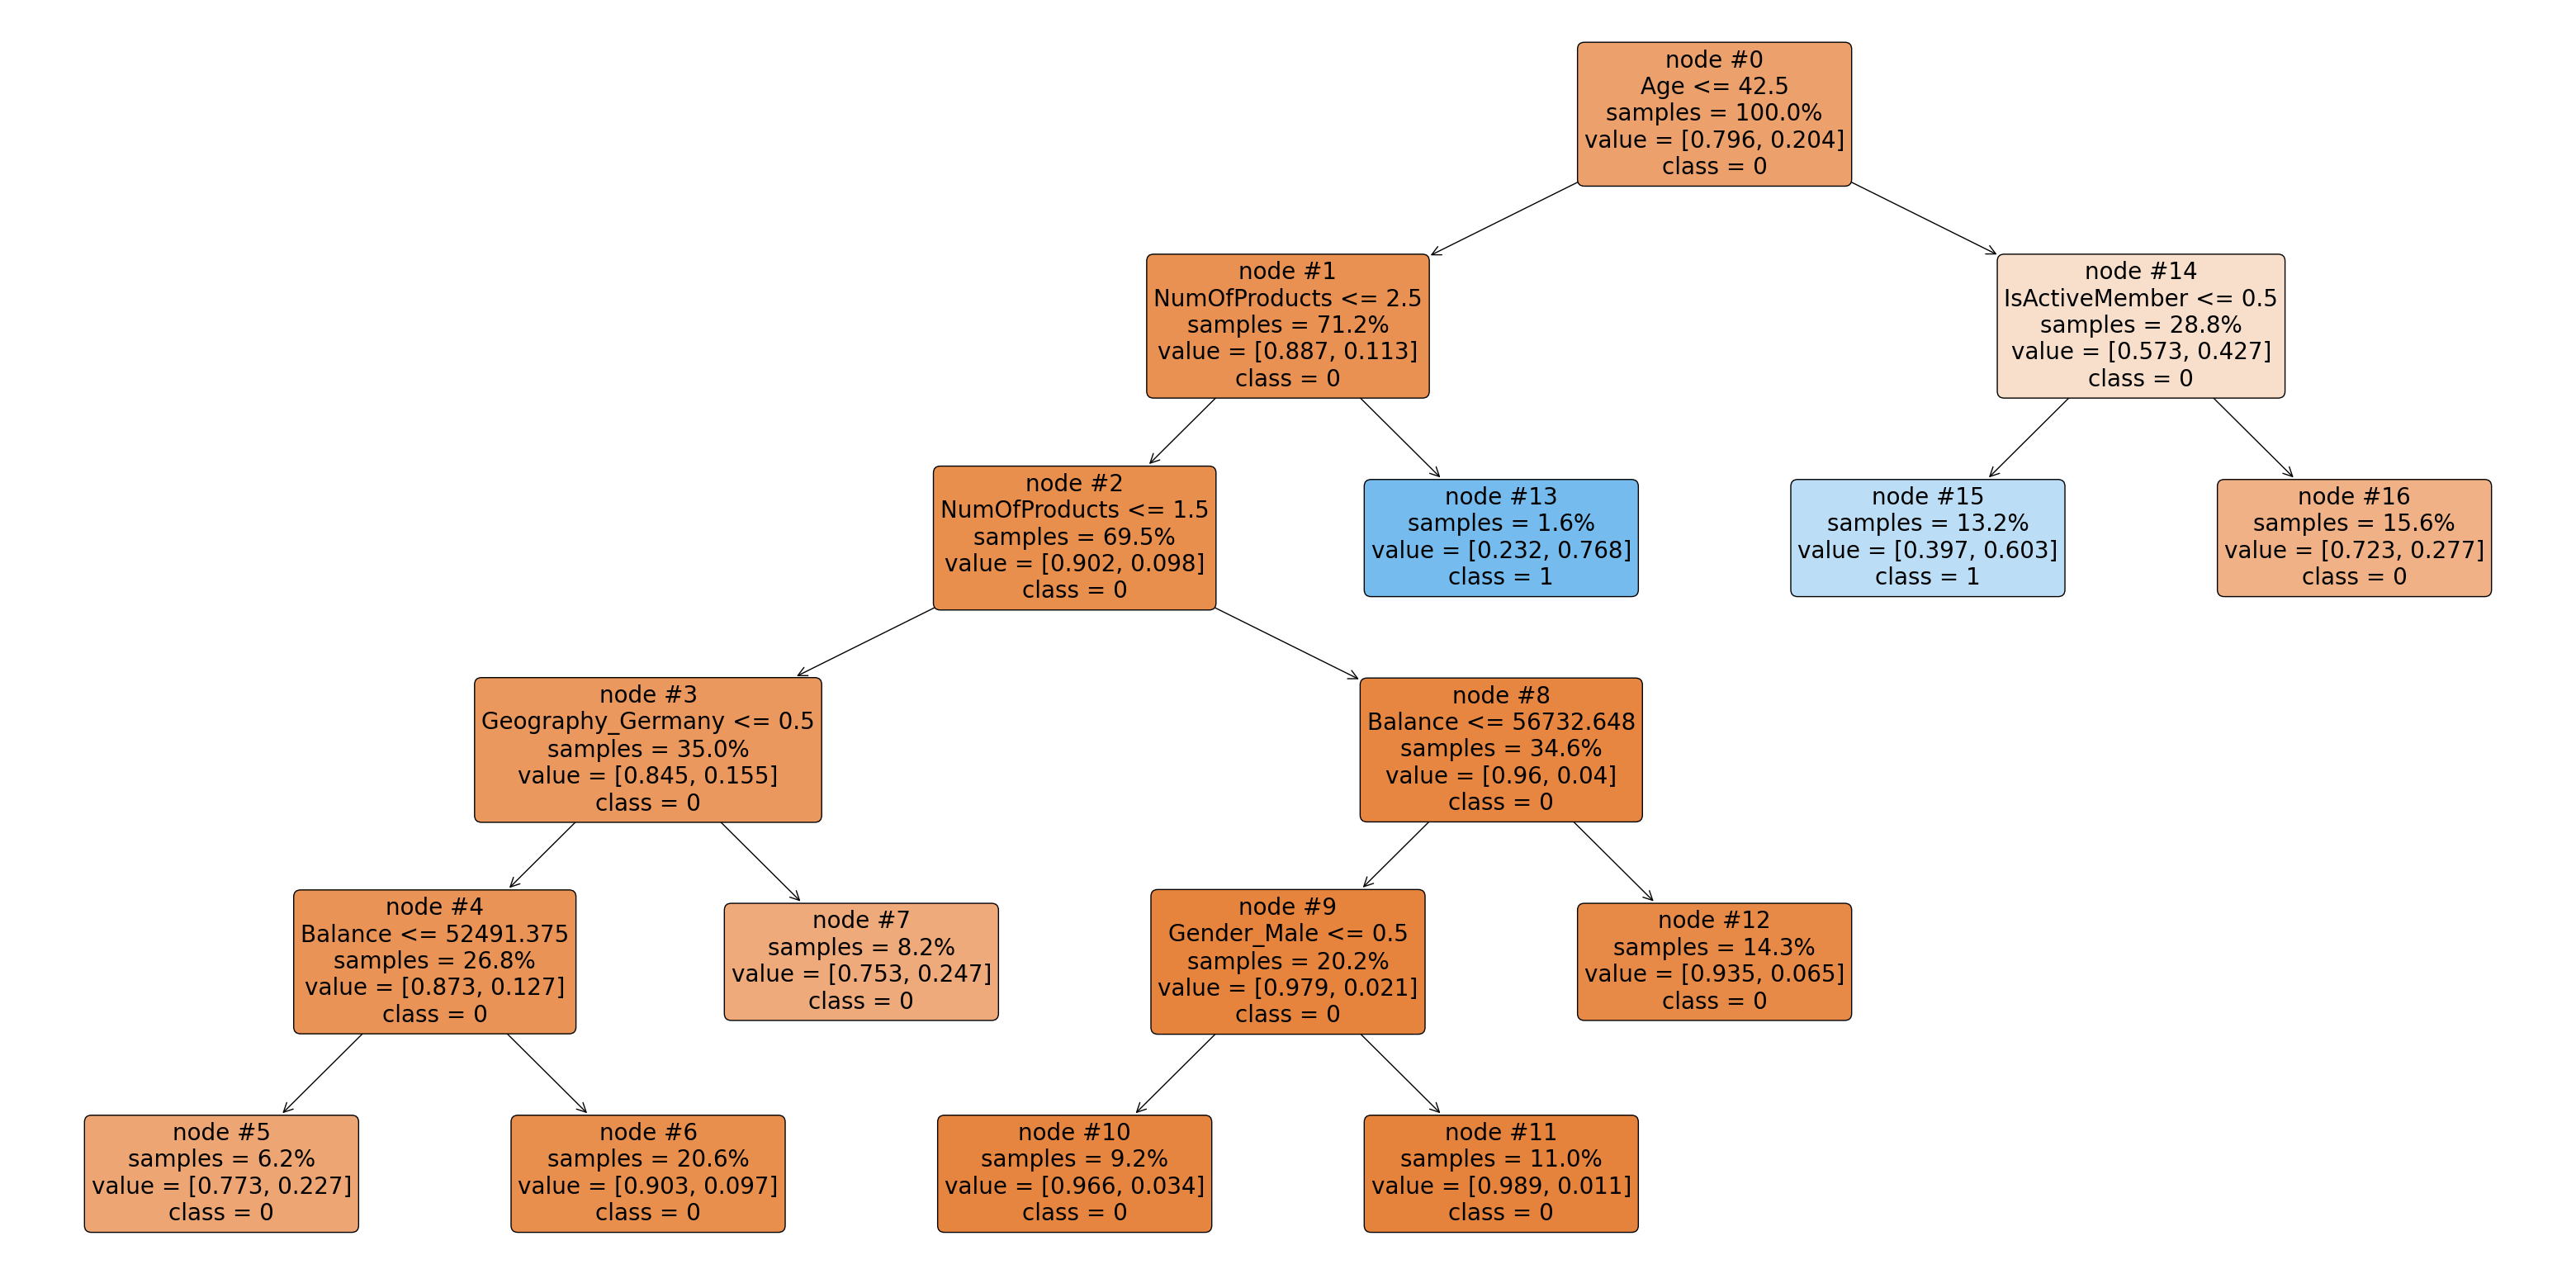

In [17]:
#splitting the dataset into a training and testing set
xTrain,xTest,yTrain,yTest = train_test_split(dummyFeatures, target, train_size = TRAINING_PART, random_state = 0, stratify = target)

#setting parameters for decision tree
dTree = DecisionTreeClassifier(max_depth = MAX_DEPTH, min_samples_split = MINIMUMSPLIT, random_state = 0)

#fitting the tree to the training model
dTree.fit(xTrain, yTrain)

featureNames = list(dummyFeatures.columns)

fig, ax = plt.subplots(figsize = (40,20))
tree.plot_tree(dTree, node_ids = True, proportion = True, impurity = False, fontsize=20, feature_names = featureNames, class_names = ['0','1'], rounded = True, filled = True)
plt.show()


In [18]:
#Getting predictions based on training and test sets
yTrainPred = dTree.predict(xTrain)
yTestPred = dTree.predict(xTest)

#evaluating the accuracy of each
trainAccuracy = accuracy_score(yTrainPred, yTrain)
testAccuracy = accuracy_score(yTestPred, yTest)
print(trainAccuracy, testAccuracy)

0.8325 0.82475


In [19]:
# Generating Confusion Matrices for the training set:
predicted = yTrainPred
observed = yTrain
confusionMatrix = confusion_matrix(observed, predicted)

print(confusionMatrix)

[[4440  338]
 [ 667  555]]


In [20]:
# Generating Confusion Matrices for the validation set:
predictedVal = yTestPred
observedVal = yTest
confusionMatrixVal = confusion_matrix(observedVal, predictedVal)

print(confusionMatrixVal)

[[2957  228]
 [ 473  342]]


In [21]:
# Correct Classification Rate:
# Check whether there is a match between each predicted value (in pred) and the actual value
predRateTraining = mean(yTrainPred == yTrain)
predRateValidation = mean(yTestPred == yTest)
trainingPercentage = "{:.2%}".format(predRateTraining)
validationPercentage = "{:.2%}".format(predRateValidation)

print("The correct classification rate based on the training set is " + trainingPercentage)
print("The correct classification rate based on the validation set is " + validationPercentage)

The correct classification rate based on the training set is 83.25%
The correct classification rate based on the validation set is 82.47%
